In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Predicting Diabetes in Women of Pima Indian Descent over the age of 21**



**INTRODUCTION**

Diabetes is a disease in which the human body is no longer able to control the delicate balance of sugar in the bloodstream, which can have serious implications. It is split up into three main types, each with its causes and risk factors. Type 1 diabetes happens when the pancreas no longer produces insulin, a protein that will decrease the amount of glucose (sugar) in the blood; while the cause of type 1 diabetes isn’t yet known, there is some indication that there might be a significant hereditary component. In type 2 diabetes the body becomes resistant to its insulin and while the cause is still mostly unknown, excess body weight, high blood pressure, genetics, and age are all factors that contribute. Gestational diabetes is similar to type 2 diabetes, the main difference being that pregnancy hormones cause its onset(5).

We seek to explore the following question: Can we determine if a woman has diabetes based on predictors such as blood glucose levels, blood pressure, number of pregnancies, insulin levels, BMI, age, skin thickness, and genetics (called diabetes pedigree function)? To answer this question, we use data collected by the National Institute of Diabetes and Digestive and Kidney Diseases. The particular data set surveyed women over the age of 21 of Pima Indian heritage(3).

**METHODOLOGY AND RESULTS**



In [2]:
set.seed(41)
url <- "https://raw.githubusercontent.com/ehaniak/Group41/main/data/diabetes.csv"
diabetes <- read_csv(url)%>% 
    mutate(Outcome = as_factor(Outcome))

Parsed with column specification:
cols(
  Pregnancies = col_double(),
  Glucose = col_double(),
  BloodPressure = col_double(),
  SkinThickness = col_double(),
  Insulin = col_double(),
  BMI = col_double(),
  DiabetesPedigreeFunction = col_double(),
  Age = col_double(),
  Outcome = col_double()
)



We downloaded the csv file from Kaggle then saved the URL as an object, and read the URL in as a csv file (3). Then we mutated the Outcome column to be a factor instead of a number, since outcomes 0 and 1 correspond to a diabetes diagnosis. 

In [3]:
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


 ##### Table 1: Diabetes dataset. All predictors shown

In [4]:
summary_of_data_diabetes_means <- summarize(diabetes,
                            mean_Pregnancies = mean(Pregnancies), 
                            mean_Glucose = mean(Glucose),
                            mean_BloodPressure = mean(BloodPressure),
                            mean_SkinThickness = mean(SkinThickness),
                            mean_Insulin = mean(Insulin),
                            mean_BMI = mean(BMI),
                            mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction),
                            mean_Age = mean(Age))
                                                  
summary_of_data_diabetes_means

mean_Pregnancies,mean_Glucose,mean_BloodPressure,mean_SkinThickness,mean_Insulin,mean_BMI,mean_DiabetesPedigreeFunction,mean_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.845052,120.8945,69.10547,20.53646,79.79948,31.99258,0.4718763,33.24089


##### Table 2: Diabetes dataset summary of means

In [5]:
summary_of_data_diabetes_max <- summarize(diabetes, 
                                        max_Pregnancies = max(Pregnancies),
                                         max_Glucose = max(Glucose),
                                         max_BloodPressure = max(BloodPressure),
                                         max_SkinThickness = max(SkinThickness),
                                         max_Insulin = max(Insulin),
                                         max_BMI = max(BMI),
                                         max_DiabetesPedigreeFunction = max(DiabetesPedigreeFunction),
                                         max_Age = max(Age))
                                       
summary_of_data_diabetes_max

max_Pregnancies,max_Glucose,max_BloodPressure,max_SkinThickness,max_Insulin,max_BMI,max_DiabetesPedigreeFunction,max_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17,199,122,99,846,67.1,2.42,81


##### Table 3: Diabetes maximum values of all predictors 

In [6]:
summary_of_data_diabetes_min <- summarize(diabetes, 
                                        min_Pregnancies = min(Pregnancies),
                                         min_Glucose = min(Glucose),
                                         min_BloodPressure = min(BloodPressure),
                                         min_SkinThickness = min(SkinThickness),
                                         min_Insulin = min(Insulin),
                                         min_BMI = min(BMI),
                                         min_DiabetesPedigreeFunction = min(DiabetesPedigreeFunction),
                                         min_Age = min(Age))
                                       
summary_of_data_diabetes_min

min_Pregnancies,min_Glucose,min_BloodPressure,min_SkinThickness,min_Insulin,min_BMI,min_DiabetesPedigreeFunction,min_Age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0.078,21


##### Table 4: Diabetes minimum values of all predictors 

In [7]:
summery_of_data_diabetes_outcome_mean_yes <- filter(diabetes, Outcome == 1)
summery_of_data_diabetes_outcome_mean_yes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
8,183,64,0,0,23.3,0.672,32,1
0,137,40,35,168,43.1,2.288,33,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6,190,92,0,0,35.5,0.278,66,1
9,170,74,31,0,44.0,0.403,43,1
1,126,60,0,0,30.1,0.349,47,1


Table 5: All predicotrs with an outcome of 1

In [8]:
summery_of_data_diabetes_outcome_mean_yes_table <- summarize(summery_of_data_diabetes_outcome_mean_yes, 
                            mean_Pregnancies_yes = mean(Pregnancies), 
                            mean_Glucose_yes = mean(Glucose),
                            mean_BloodPressure_yes = mean(BloodPressure),
                            mean_SkinThickness_yes = mean(SkinThickness),
                            mean_Insulin_yes = mean(Insulin),
                            mean_BMI_yes = mean(BMI),
                            mean_DiabetesPedigreeFunction_yes = mean(DiabetesPedigreeFunction),
                            mean_Age_yes = mean(Age))

summery_of_data_diabetes_outcome_mean_yes_table

mean_Pregnancies_yes,mean_Glucose_yes,mean_BloodPressure_yes,mean_SkinThickness_yes,mean_Insulin_yes,mean_BMI_yes,mean_DiabetesPedigreeFunction_yes,mean_Age_yes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.865672,141.2575,70.82463,22.16418,100.3358,35.14254,0.5505,37.06716


Table 6: The mean of predicotrs with an outcome of 1

In [9]:
summery_of_data_diabetes_outcome_mean_no <- filter(diabetes,
                                           Outcome == 0)
summery_of_data_diabetes_outcome_mean_no

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,0
1,89,66,23,94,28.1,0.167,21,0
5,116,74,0,0,25.6,0.201,30,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,93,70,31,0,30.4,0.315,23,0


Table 7: All predicotrs with an outcome of 0

In [10]:
summery_of_data_diabetes_outcome_mean_no_table <- summarize(summery_of_data_diabetes_outcome_mean_no, 
                            mean_Pregnancies_no = mean(Pregnancies), 
                            mean_Glucose_no = mean(Glucose),
                            mean_BloodPressure_no = mean(BloodPressure),
                            mean_SkinThickness_no = mean(SkinThickness),
                            mean_Insulin_no = mean(Insulin),
                            mean_BMI_no = mean(BMI),
                            mean_DiabetesPedigreeFunction_no = mean(DiabetesPedigreeFunction),
                            mean_Age_no = mean(Age))

summery_of_data_diabetes_outcome_mean_no_table

mean_Pregnancies_no,mean_Glucose_no,mean_BloodPressure_no,mean_SkinThickness_no,mean_Insulin_no,mean_BMI_no,mean_DiabetesPedigreeFunction_no,mean_Age_no
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.298,109.98,68.184,19.664,68.792,30.3042,0.429734,31.19


Table 8: The mean of predicotrs with an outcome of 0

We summarized the data in terms of the mean of each predictor so that the means of the histograms can be set. The mean of all the predictors for both outcomes were found as well. We repeated this for the maximum and minimum of each predictor. 

Warning message:
“Ignoring unknown parameters: binwidth”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



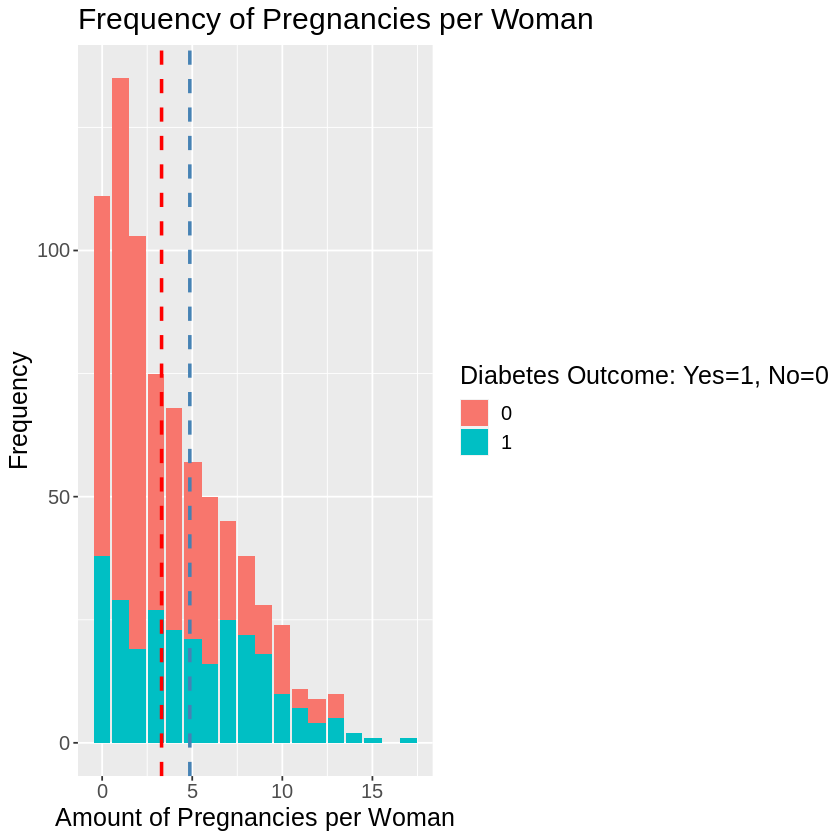

In [11]:
diabetes_hist_Pregnancies <- ggplot(diabetes, aes(x = Pregnancies, fill = (Outcome))) +
    geom_histogram() +
    stat_count(binwidth = 0.005) +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_Pregnancies_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_Pregnancies_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Amount of Pregnancies per Woman", 
         y = "Frequency", xintercept = "outcome",
         fill = "Diabetes Outcome: Yes=1, No=0") +
    theme(text = element_text(size = 15)) + 
    ggtitle("Frequency of Pregnancies per Woman")

diabetes_hist_Pregnancies

##### Graph 1: Amount of Pregnancies per woman, coloured by diabetes diagnosis

Increasing the number of pregnancies correlates to a higher proportion of women with diabetes vs without diabetes. While most women with diabetes are in the 0 pregnancy bin, it is important to consider that fewer women have such a high number of pregnancies. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



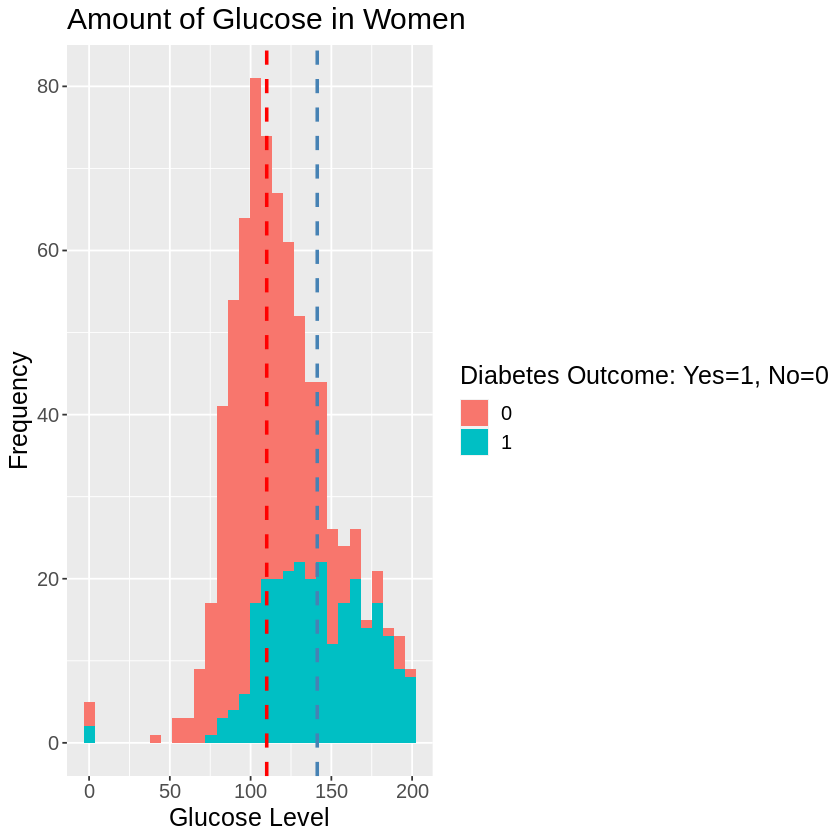

In [12]:
diabetes_hist_Glucose <- ggplot(diabetes, aes(x = Glucose, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_Glucose_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_Glucose_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Glucose Level", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Glucose in Women")

diabetes_hist_Glucose

##### Graph 2: Glucose Levels in Women, coloured by diabetes diagnosis

From glucose levels of 80 -140, there is a higher proportion of women without Diabetes, compared to above levels of 150+ where there is a roughly equal proportion of women with and without Diabetes. The centers of women with and without diabetes are note the same, indicating on average, women with diabetes have a higher glucose level than women without diabetes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



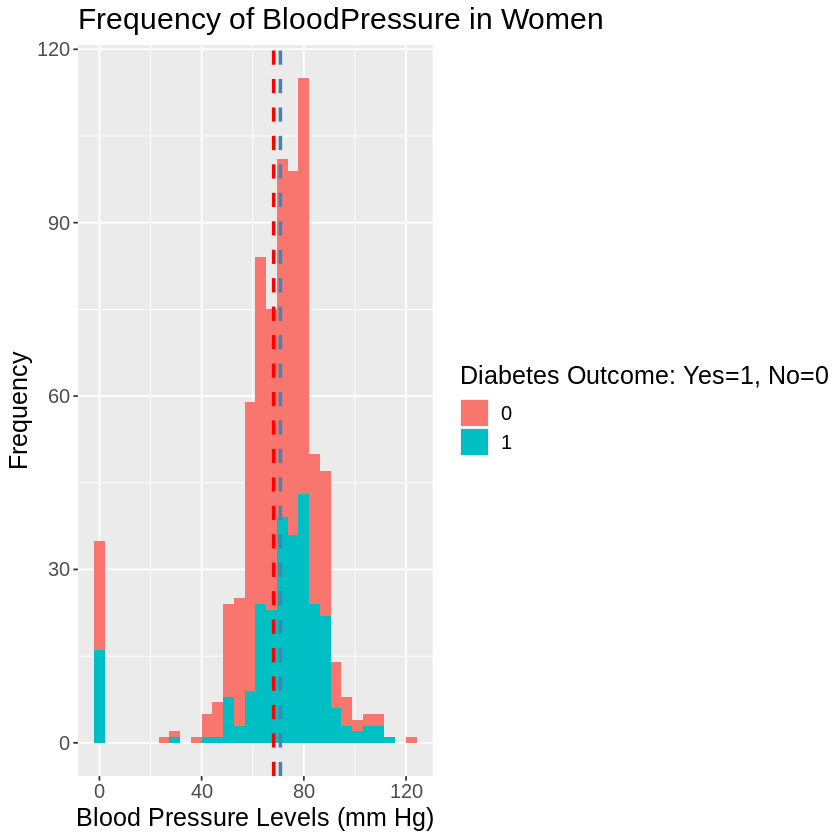

In [13]:
diabetes_hist_BloodPressure <- ggplot(diabetes, aes(x = BloodPressure, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_BloodPressure_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_BloodPressure_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Blood Pressure Levels (mm Hg)", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) +
    ggtitle("Frequency of BloodPressure in Women")

diabetes_hist_BloodPressure

##### Graph 3: Blood Pressure Levels in Women, coloured by diabetes diagnosis

As blood pressure increases, the proportion of women with diabetes increases. This indicates that high blood pressure has a correlation to diabetes. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



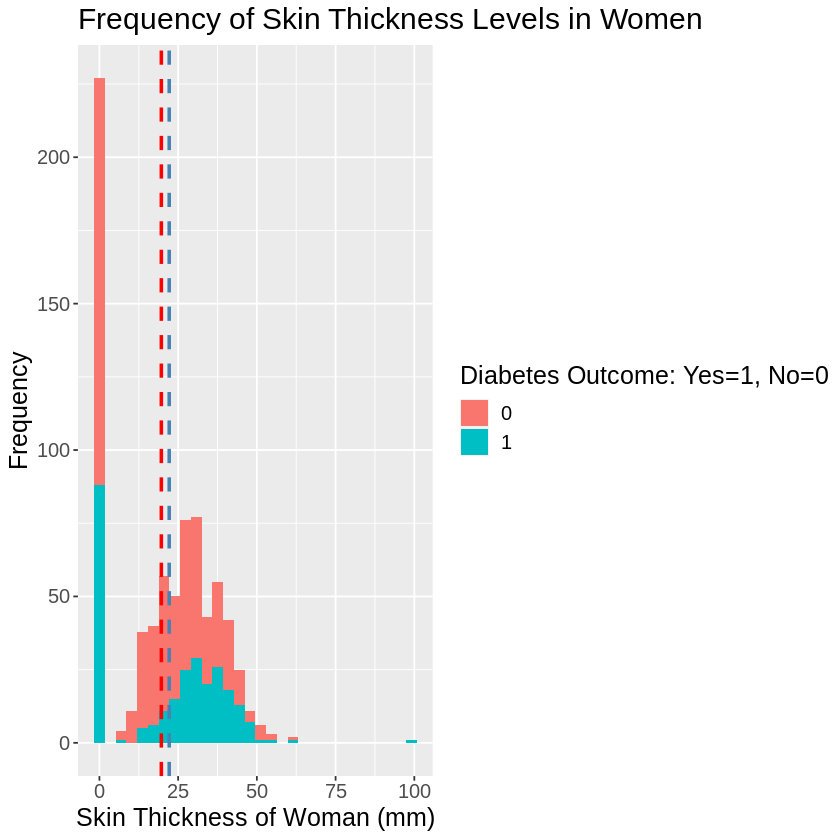

In [14]:
diabetes_hist_SkinThickness <- ggplot(diabetes, aes(x = SkinThickness, fill = (Outcome))) + 
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_SkinThickness_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_SkinThickness_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Skin Thickness of Woman (mm)", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) +
    ggtitle("Frequency of Skin Thickness Levels in Women")

diabetes_hist_SkinThickness

##### Graph 4: Skin Thickness Levels in Women, coloured by diabetes diagnosis

As skin thickness increases, the proportion of women with diabetes increases. The biggest difference in proportion in skin thickness is seen around 12- 30 mm, after which the proportions of women with diabetes increases as skin thickness increases, suggesting a correlation between higher skin thickness and diabetes. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



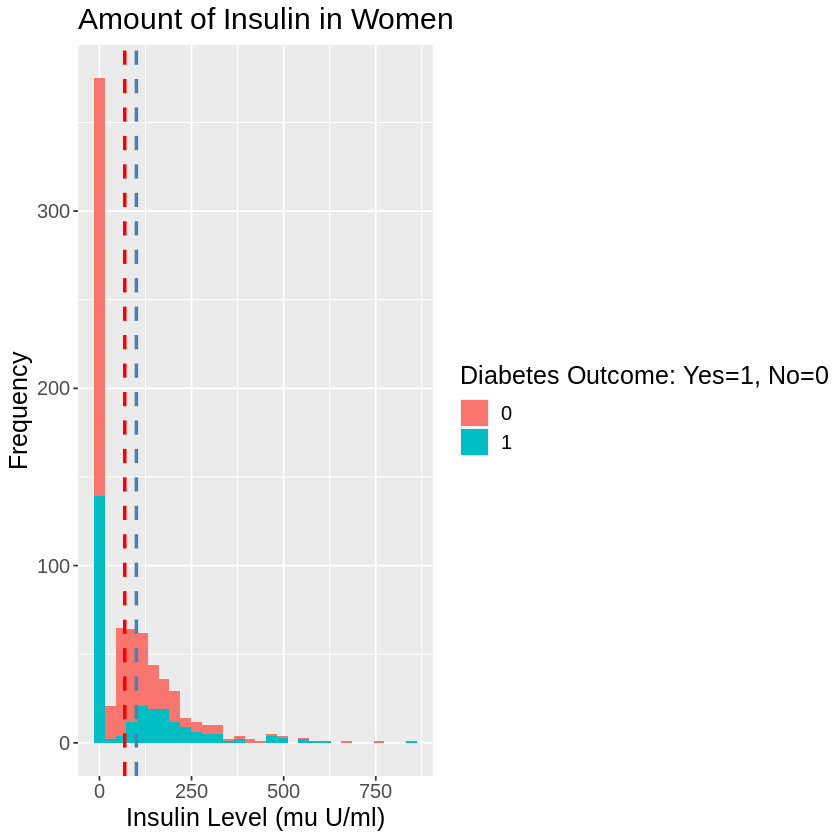

In [15]:
diabetes_hist_Insulin <- ggplot(diabetes, aes(x = Insulin, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_Insulin_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_Insulin_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Insulin Level (mu U/ml)", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("Amount of Insulin in Women")

diabetes_hist_Insulin

##### Graph 5: Insulin Levels in Women, coloured by diabetes diagnosis

Increasing insulin levels show an increasing proportion of women with diabetes. This indicates that higher insulin levels correlate to diabetes. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



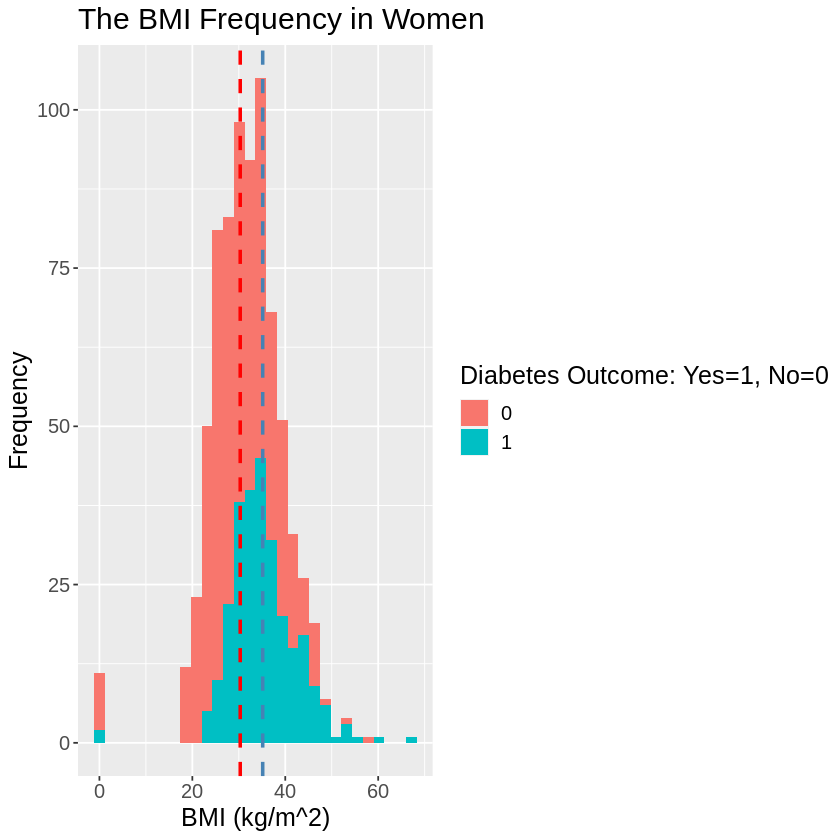

In [16]:
diabetes_hist_BMI <- ggplot(diabetes, aes(x = BMI, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_BMI_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_BMI_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "BMI (kg/m^2)", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The BMI Frequency in Women")

diabetes_hist_BMI

##### Graph 6: BMI Score in Women, coloured by diabetes diagnosis

Increasing BMI shows an increased proportion of women with diabetes, especially at high values such as ~50 +. We see a peak in the number of women with diabetes around 35-40 BMI. This graph indicates that a high BMI is correlated with diabetes.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



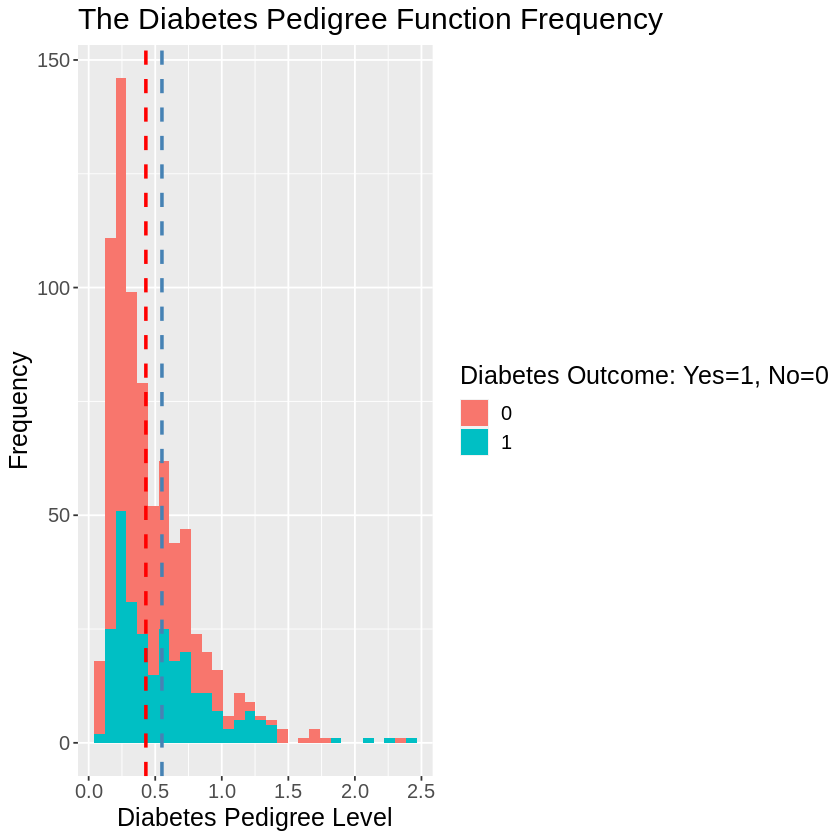

In [17]:
diabetes_hist_DiabetesPedigreeFunction <- ggplot(diabetes, aes(x = DiabetesPedigreeFunction, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_DiabetesPedigreeFunction_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_DiabetesPedigreeFunction_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Diabetes Pedigree Level", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Diabetes Pedigree Function Frequency")

diabetes_hist_DiabetesPedigreeFunction

##### Graph 7: Diabetes Pedigree in Women, coloured by diabetes diagnosis
Increasing the diabetes pedigree level increases the proportion of women with diabetes, indicating that there is a positive correlation between genetics and diabetes. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



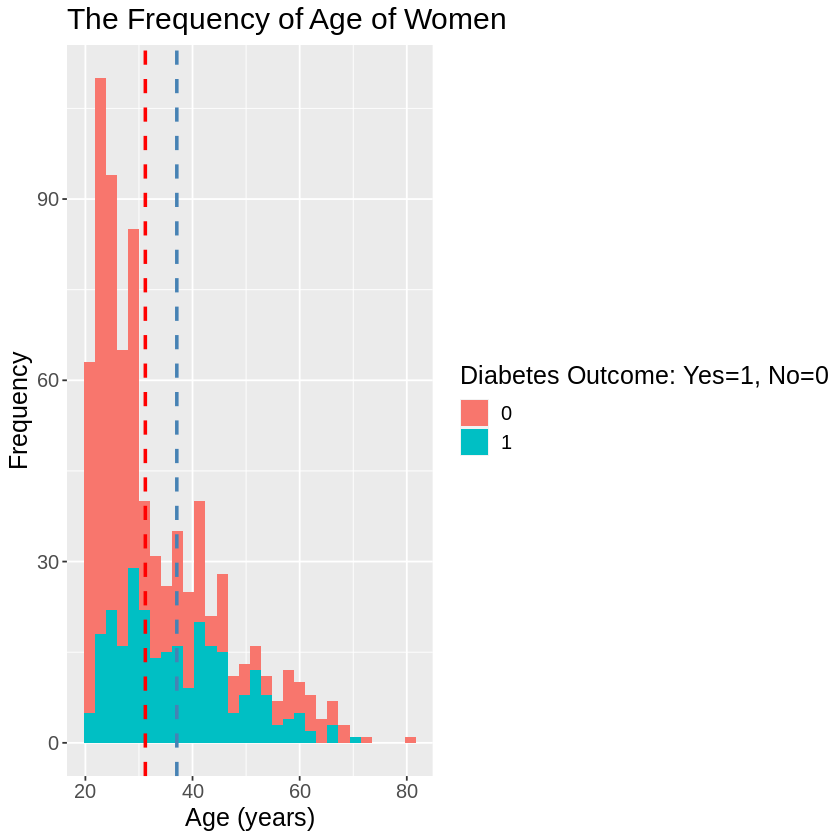

In [18]:
diabetes_hist_Age <- ggplot(diabetes, aes(x = Age, fill = (Outcome))) +
    geom_histogram() +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_no_table$mean_Age_no,
               linetype = "dashed", size = 1, colour = "red") +
    geom_vline(xintercept = summery_of_data_diabetes_outcome_mean_yes_table$mean_Age_yes,
               linetype = "dashed", size = 1, colour ="steel blue") +
    labs(x = "Age (years)", 
         y = "Frequency", 
         fill = "Diabetes Outcome: Yes=1, No=0") +
         theme(text = element_text(size = 15)) + 
    ggtitle("The Frequency of Age of Women")

diabetes_hist_Age

##### Graph 8: Age in Women, coloured by diabetes diagnosis

In this graph, there are less women under 30 with diabetes than women over 30. The proportion of women with diabetes is correlated to age.

The next step to our exploratory analysis was to validate the significance of all the predictors present in the dataset. To do this, we visualized the frequency of women with and without diabetes for each predictor, using histograms for intuitive visualization of two possible outcomes. (4). Ggplot and geom_histogram were used (7). Furthermore, by obtaining a mean for women with and without diabetes of each predictor, it was made more clear what their frequencies represented.

**ClASSIFICATION PREDICTIVE MODEL**

In [19]:
set.seed(41)
diabetes_split <- initial_split(prop = 0.75, strata = Outcome, data = diabetes)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)

Next, we split our data set randomly into testing and training sets, so that we could create the model with our training data (75% of data) which we would apply to our testing data (25% of data) to assess the accuracy of our model.


In [20]:
set.seed(41)
diabetes_recipe <- recipe(Outcome ~ ., data = diabetes_training)%>% 
    step_scale(all_predictors())%>% 
    step_center(all_predictors())
diabetes_knn <- nearest_neighbor(weight_func = "rectangular", neighbors =tune())%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          8

Operations:

Scaling for all_predictors()
Centering for all_predictors()

To build our model, we chose to perform a K nearest neighbor classification for simplicity, accuracy, and efficiency.. We instructed the model to use the straight line distance and use the tune function to try K values in order to get the highest accuracy (7). Using the recipe function, we specified our predictors, scaling them all so that the distance between the points wouldn’t be skewed by the different value scales and units. 

In [ ]:
set.seed(41)
diabetes_vfold <- vfold_cv(diabetes_training, v = 5, strata = Outcome)

tibble_k <- tibble(neighbors = seq(1,100,4))

diabetes_fit <- workflow()%>%
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn)%>% 
    tune_grid(resamples= diabetes_vfold, grid = tibble_k) 

diabetes_accuracies <- diabetes_fit %>% 
    collect_metrics()%>%
    filter(.metric == "accuracy")

diabetes_accuracies

Table 9: The accuracy of the diebetes data

We Implemented a 5 fold cross validation to identify a K that would allow our model to predict with higher accuracy on our testing set. Before putting our model and our recipe together in a workflow, we needed to tell our model what K values to try. We created a tibble to specify that we wanted to try K values between 1 and 100, increasing by increments of 4. We opted for this method to have a wide range of K-values. This method did not overwhelm the capacity of our model, which does not have more than 500 observations. The recipe and model were added to a workflow, with our cross validated data, finding a K value within the range specified. The metrics were then collected and filtered for accuracy because it is the statistic we care about. 


In [ ]:
set.seed(41)
accuracy_diabetes_plot <- diabetes_accuracies %>%
    ggplot(aes(x= neighbors, y= mean))+
    geom_point()+
    geom_line()+ 
    labs(x = "K value", y= "Mean Accuracy")
accuracy_diabetes_plot

Graph 9: Graph to indicate our K value 

In [ ]:
set.seed(41)
diabetes_knn_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 41
                                      )%>% 
    set_engine("kknn") %>% 
    set_mode("classification")

diabetes_fitted_final <- workflow()%>% 
    add_recipe(diabetes_recipe)%>% 
    add_model(diabetes_knn_final)%>% 
    fit(data = diabetes_training)
diabetes_fitted_final


In [ ]:
set.seed(41)
diabetes_predictions <- predict(diabetes_fitted_final, diabetes_testing)%>%
    bind_cols(diabetes_testing)
diabetes_metrics <- diabetes_predictions %>% 
    metrics(truth = Outcome, estimate = .pred_class) %>% 
    filter(.metric == "accuracy")
diabetes_metrics
diabetes_confusion <- diabetes_predictions %>% 
  conf_mat(truth = Outcome, estimate = .pred_class)
diabetes_confusion

Table 10: Predicted and True values as a tibble

In [ ]:
set.seed(41)
    Truth <- c(1, 1, 0, 0 )
Predicted <- c(1, 0, 1, 0)
   Values <- c(28, 39, 8, 117)

dataframe_for_visualization <- data.frame(Truth, Predicted, Values)%>% 
    mutate(Truth = as_factor(Truth),
          Predicted = as_factor(Predicted))
dataframe_for_visualization

vizualization_of_conf_mat <- ggplot(dataframe_for_visualization, aes(x= Truth, y = Predicted, fill = as_factor(Values)))+
geom_tile()+
geom_text(aes(fill = as.factor(dataframe_for_visualization$Values), label = dataframe_for_visualization$Values))+ 
labs(x= "Actual Outcome", y= "Predicted Outcome",fill = "Results")+
ggtitle("Confusion Matrix Visualization")

vizualization_of_conf_mat

**Red: Predicted Diabetes, Actually not Diabetes**

**Green: Predicted Diabetes, Actually Diabetes**

**Purple: Predicted not Diabetes, Actually not Diabetes**

**Blue: Predicted not Diabetes, Actually Diabetes**

Table 11: Predicted and True values as a table

Graph 10: Visulization of confusion matrix

**DISCUSSION**

Through our exploratory data analysis, we broke down each of the predictor’s distributions for women with and without diabetes. Because the distribution for each predictor was not discrete and the means for both women with and without diabetes were non-equivalent, it is concluded that every predictor is significant. However, some histograms returned unexpected results.


Through research and data analysis,  it was indicated that the skin thickness of a woman can have a direct correlation to their insulin levels. Collagen is what builds the thickness of a person's skin which may indicate that there is a relationship between the proteins in collagen and someone that gets diagnosed with diabetes due to their abnormal insulin levels (2). 


For skin thickness, we expected the gap between the means of positive and negative diabetes diagnosis to be much greater than what we found. This could be likely due to the large amount of observations with a score of 0 skin thickness, which is intuitively impossible. The mean of women with diabetes is brought down significantly, which is skewing the data. Similarly, with insulin, the histogram suggests that high insulin levels are correlated with having diabetes. This is not typically the case; high insulin levels may be present in individuals with type 2 diabetes, but individuals with type 1 diabetes typically suffer from low insulin levels (5). The histogram does not corroborate our research, and could be the case because the dataset does not specify diabetes type, meaning it could contain both types, or once again, due to the disproportionate number of observations with 0 insulin, highly likely to be skewing our data.


The results obtained by the classification model were of a lower accuracy than expected. Based on our literature research and the exploratory data analysis, we gathered that the predictors we used were significant predictors of diabetes (5).  We expected that since each of the predictors is significant, our model would classify the data with a higher accuracy than achieved: 75.5%. While 75.5% is not a bad accuracy, if we consider that 47/192 values were incorrectly predicted, this could have dire consequences for people who are being wrongly diagnosed.


Further questions on this topic could look into how changing certain aspects of one lifestyle could affect a diabetes diagnosis and how those changes impact the predictor values. The classification result tells us that these predictors are related to getting a diagnosis of diabetes. Although it is unknown exactly what causes diabetes, it’s proven that diabetes directly impacts how our body digests glucose and produces insulin, and such predictors we have chosen reflects that (5). As the data we have analyzed only takes in the target of women in Pima Indian Descent over the age of 21, it may not be representative of other demographics. Future research could look into if these predictors are still as relevant for different demographics. However, there are some lifestyle changes one can implement such as having a healthy diet or exercising to lower the risk of diabetes (2).


**REFERENCES** 

(1) Centers for Disease Control and Prevention. (2022, April 5). Diabetes risk factors. Centers for Disease Control and Prevention. Retrieved April 5, 2022, from https://www.cdc.gov/diabetes/basics/risk-factors.html 

(2) Collier, A., Patrick, A. W., Bell, D., Matthews, D. M., MacIntyre, C. C., Ewing, D. J., & Clarke, B. F. (1989). Relationship of skin thickness to duration of diabetes, glycemic control, and diabetic complications in male IDDM patients. Diabetes Care, 12(5), 309-312. https://doi.org/10.2337/diacare.12.5.309

(3) Diabetes Dataset. (2020, 8 5). Kaggle. Retrieved 3 3, 2022, from https://www.kaggle.com/mathchi/diabetes-data-set

(4) Government of Canada, Statistics Canada. “5 Data Visualization 5.7 Histogram.” 5.7 Histogram, 2 Sept. 2021, https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch9/histo/5214822-eng.htm. 

(5) Mayo Clinic Staff. (2020, 10 30). Diabetes. Mayo Clinic. Retrieved 3 3, 2022, from https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444 

(6) Mayo Foundation for Medical Education and Research. (2021, June 25). Diabetes prevention: 5 tips for taking control. Mayo Clinic. Retrieved April 5, 2022, from https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/in-depth/diabetes-prevention/art-20047639

(7) Timbers, T., Campbell, T., & Lee, M. (2022). Data Science: A first Introduction. CRC Press. https://datasciencebook.ca/index.html
